In [101]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [102]:
np.random.seed(0)

In [103]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [105]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of label."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of label."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

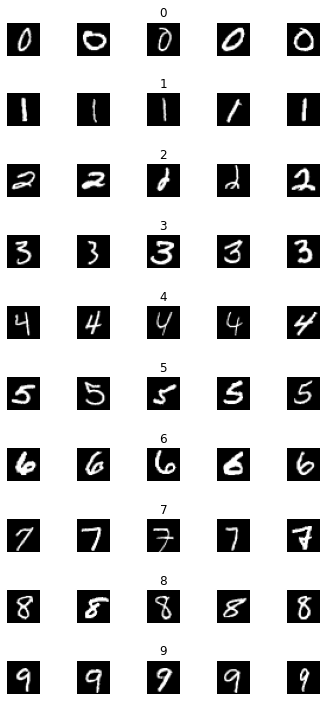

In [106]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

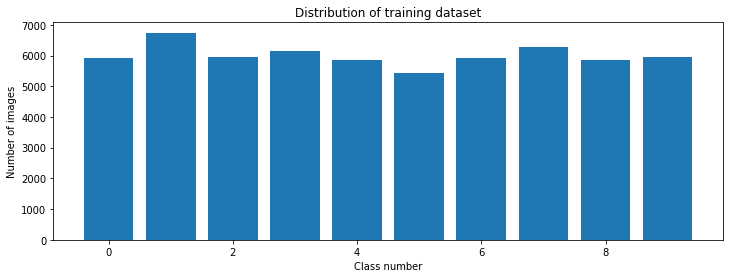

In [107]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [108]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [109]:
X_train = X_train/255
X_test = X_test/255

In [110]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [111]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [112]:
model = create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_19 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [113]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 1.0723 - accuracy: 0.6368 - val_loss: 0.3176 - val_accuracy: 0.9045
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3712 - accuracy: 0.8915 - val_loss: 0.2551 - val_accuracy: 0.9293
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.9105 - val_loss: 0.2392 - val_accuracy: 0.9330
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2798 - accuracy: 0.9172 - val_loss: 0.2232 - val_accuracy: 0.9378
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.9194 - val_loss: 0.2297 - val_accuracy: 0.9335
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2597 - accuracy: 0.9224 - val_loss: 0.2257 - val_accuracy: 0.9383
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2515 - accuracy: 0.9247 - val_loss: 0.2118 - val_accuracy: 0.9395
Epoch 

Text(0.5, 0, 'epoch')

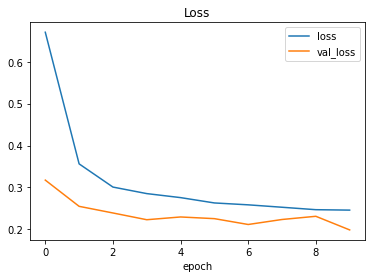

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

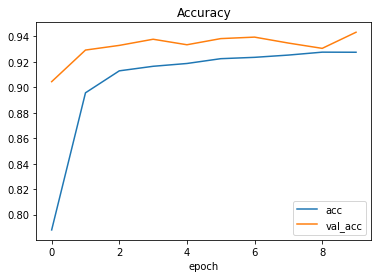

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [116]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2635837197303772
Test accuracy: 0.9248999953269958


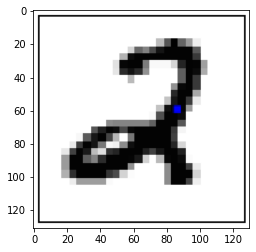

In [117]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

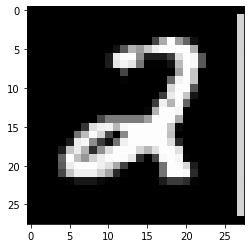

In [118]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [119]:
image = image/255
image = image.reshape(1, num_pixels)

In [120]:
prediction = model.predict_classes(image)
print("predictied digit:", str(prediction))

predictied digit: [2]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [121]:
# Accuracy is not good enough - Move on to using convolutional network